In [1]:
# Load packages
import requests 
import pandas as pd 
import time
import re

from bs4 import BeautifulSoup
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.chrome.service import Service 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [2]:
current_url = 'https://play.google.com/store/apps/details?id=com.ubercab.eats&hl=en&showAllReviews=true'

<!DOCTYPE html>
<html dir="ltr" lang="en"><head><base href="https://play.google.com/"/><meta content="origin" name="referrer"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="yes" name="mobile-web-app-capable"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="sBw2N8uateIzRr93vmFze5MF_35vMk5F1wG04L5JcJE" name="google-site-verification"/><meta content="PJKdyVFC5jlu_l8Wo_hirJkhs1cmitmn44fgpOc3zFc" name="google-site-verification"/><link href="/opensearch.xml" rel="search" title="Google Play" type="application/opensearchdescription+xml"/><link href="//www.gstatic.com/android/market_images/web/favicon_v3.ico" rel="shortcut icon"/><script data-id="_gd" nonce="vXQUMkSTkWgCgs_IxETCbA">window.WIZ_global_data = {"AKEyDc":"%.@.[\"com.ncsoft.baseball.h3\",\"com.ncsoft.lineagem19\",\"com.ncsoft.lineage2m19\",\"com.ncsoft.tricksterm\",\"com.ncsoft.tricksterm19\",\"com.ncsoft.bns2\",\"com.ncsoft.bns219\",\"com.ncsoft.lineage2mjp\",\"com.ncsoft
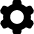
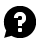
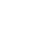
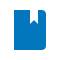
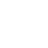
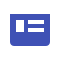
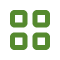
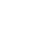
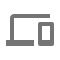
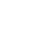
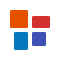
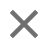
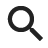
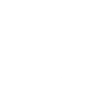
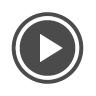

In [3]:
resp = requests.get(current_url)
content = BeautifulSoup(resp.content, 'lxml')
print(content)

In [51]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def google_play_store(url):
    # Set up the Chrome driver service
    service = Service(executable_path="C:\\Program Files (x86)\\chromedriver.exe")
    # Instantiate the webdriver with the above service
    driver = webdriver.Chrome(service=service)
    # Go to the page you want to scrape
    driver.get(url)

    # Find and click see all reviews button using explicit wait
    see_all_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//span[text()='See all reviews']"))
    )
    see_all_button.click()

    # Get the reviews container to scroll down later on
    reviews_container = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'fysCi'))
    )

    review_list = []
    count = 1

    start_time = time.time()
    scroll_duration = 500  # 2 minutes
    while time.time() - start_time < scroll_duration:
        driver.execute_script("arguments[0].scrollBy(0, 1000);", reviews_container)

    while count <= 10000:
        # Get all the review elements
        content = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CLASS_NAME, 'RHo1pe'))
        )

        # Process a batch of reviews
        for post in content:
            try:
                review = post.find_element(By.CLASS_NAME, 'h3YV2d').text
                date = post.find_element(By.CLASS_NAME, 'bp9Aid').text
                stars_el = post.find_element(By.CLASS_NAME, 'iXRFPc')
                stars_label = stars_el.get_attribute('aria-label')
                name = post.find_element(By.CLASS_NAME, 'X5PpBb').text

                data = {
                    "review": review,
                    "date": date,
                    "stars": stars_label,
                    "name": name,
                    "source": "Google Play Store",
                }

                review_list.append(data)

                # Add a counter to break the loop after 1000 reviews
                count += 1
                if count > 10000:
                    break

            except Exception as e:
                print(e)
                continue

        # # Scroll down to load more reviews
        # driver.execute_script("arguments[0].scrollBy(0, 1000);", reviews_container)

    driver.quit()

    return pd.DataFrame(review_list)


In [52]:
df_reviews = google_play_store(current_url)  
df_reviews

,review,date,stars,name,source
0,I used the app occasionally but I had to delet...,"January 18, 2024",Rated 1 stars out of five stars,Sahra O,Google Play Store
1,"This application is becoming unbearable, inste...","January 17, 2024",Rated 1 stars out of five stars,Ishak Al Khatib,Google Play Store
2,"Ignoring the astronomical ""taxes and fees"", I ...","January 12, 2024",Rated 2 stars out of five stars,Steph V,Google Play Store
3,Ive had an absolutely horrible experience with...,"January 9, 2024",Rated 1 stars out of five stars,Charmaine N,Google Play Store
4,Search function is awful. You search for certa...,"January 12, 2024",Rated 3 stars out of five stars,Z M,Google Play Store
...,...,...,...,...,...
9995,"Never recieved an order and got it refunded, b...","November 27, 2023",Rated 1 stars out of five stars,Yasmine Eid,Google Play Store
9996,"The app itself works great, but the service ha...","December 31, 2023",Rated 1 stars out of five stars,Lance NoPants,Google Play Store
9997,"They should rename this app ""Uber Missing Food...","January 6, 2024",Rated 1 stars out of five stars,Epifocol,Google Play Store
9998,Ease of use is OK but you can't see what resta...,"January 6, 2024",Rated 2 stars out of five stars,M Anonymous,Google Play Store


In [39]:
df_reviews.to_csv("test.csv", index= False)

In [54]:
unique_counts = df_reviews.nunique()

print(unique_counts)

review    240
date       72
stars       5
name      240
source      1
dtype: int64


## Library to do it

In [ ]:
from google_play_scraper import Sort, reviews_all , app
import plotly.express as px

In [ ]:
ubereats_project = reviews_all("com.ubercab.eats", sleep_milliseconds=0, lang='en', country='us',sort=Sort.NEWEST, count=1000)

In [ ]:
library_df = pd.json_normalize(ubereats_project)

In [ ]:
library_df.head()

In [ ]:
library_df.info()

In [ ]:
library_df.shape